## Explore 

In this notebook we look at the dataset and gather some insights for preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from pathlib import Path
from PIL import Image


from typing import List, Dict, Any, Optional

In [6]:
ROOT_PATH = Path('..')
RAW_DATA_DIR = ROOT_PATH / 'data/raw'
IMAGES_DIR = RAW_DATA_DIR / 'images'
LABELS_DIR = RAW_DATA_DIR / 'labels'
TEST_IMAGES_DIR = RAW_DATA_DIR / 'test_images'

In [7]:
def get_files(path: Path) -> List:
  return sorted(path.glob('*.png'))

In [8]:
image_paths = get_files(IMAGES_DIR)
label_paths = get_files(LABELS_DIR)

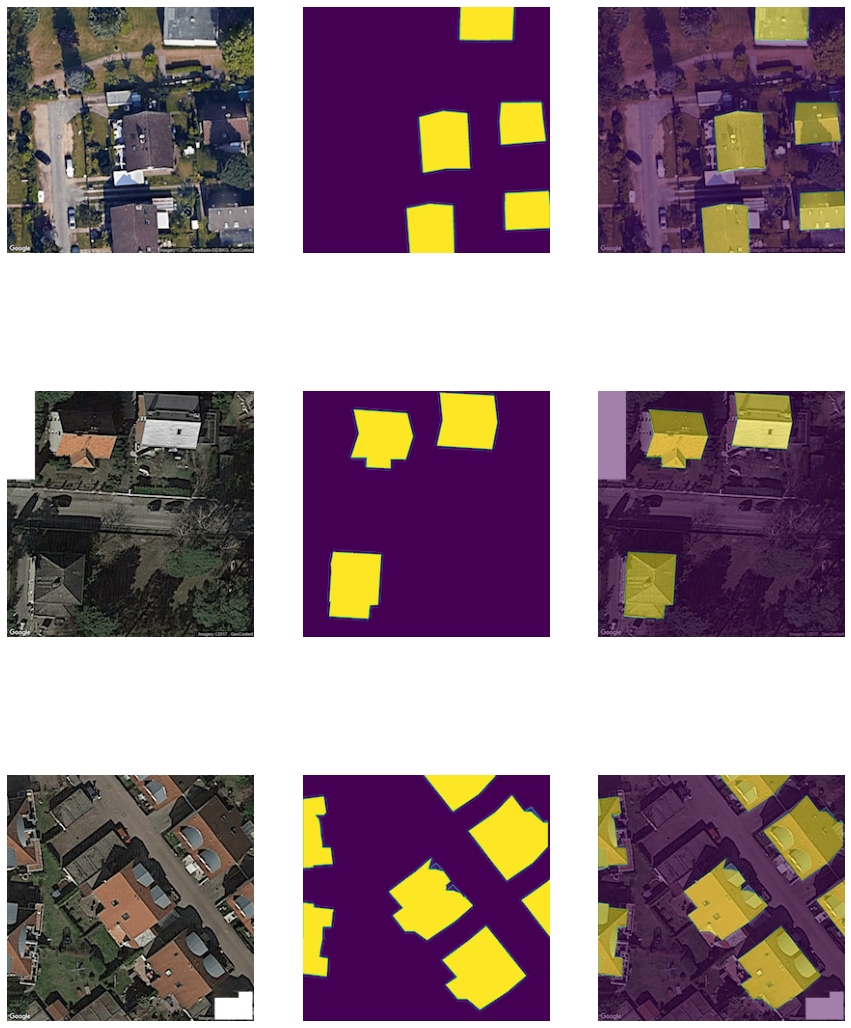

In [9]:
fig, m_axs = plt.subplots(3, 3, figsize = (15, 20))
for (i_axs, l_axs, imp_axs), image_path, label_path in zip(m_axs, image_paths[:4], label_paths[:4]):
  image = Image.open(image_path)
  label = Image.open(label_path)

  i_axs.imshow(image)
  i_axs.axis('off')

  l_axs.imshow(label)
  l_axs.axis('off')

  imp_axs.imshow(image)
  imp_axs.imshow(label, alpha=0.5)
  imp_axs.axis('off')




In [10]:
print(np.unique(label))


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [11]:
print(image.mode)
print(label.mode)

RGBA
L


#### Observations

* white patches in the images - maybe interpolate to neighboring image feature instead of keeping it white?
* some images have shadows which might make make it hard esp if rooftop is also blackish - brightness variation as one of the augmentation methods
* image mode is RGBA - most pretrained models will take 3 channels so convert it to RGB 
* label seems to have a range of values instead of 0, 255 